<div style="direction:rtl; text-align:right">

# المشروع الرابع: هل تستطيع توقع تصنيف الأعداد

<div style="direction:rtl; text-align:right">
أهلاً بكم في المشروع الرابع. في هذ المشروع، سنتعمق في أساسيات بناء النماذج ولفعل ذلك سنقوم باستخدام بيانات الأعداد لتصنيف الأعداد من 0 إلى 9 بناء على الصور فقط! سنقوم في هذا المشروع بالعمل على بيانات كاقل التالية: 

- https://www.kaggle.com/c/digit-recognizer

<div style="direction:rtl; text-align:right">
ملاحظة: عليك تعديل الخانات التي يوجد فيها الكود أدناه قبل تسليم المشروع. جميع الخانات الأخرى يجب ان تبقى كما هي بدون أي 
تعديل.

```
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<div style="direction:rtl; text-align:right">

# قراءة البيانات

<div style="direction:rtl; text-align:right">
سنقوم أولاً بقراءة البيانات. كما ذكرنا، البيانات عبارة عن صور 28 x 28 بكسل. بالتالي نتوقع أن نرى 28 * 28 = 784 عمود. كل عمود يحوي على قيمة البكسل.

In [2]:
train_data = pd.read_csv('digit-recognizer/train.csv')

<div style="direction:rtl; text-align:right">
لنر كيف تبدو الأعمدة:

In [3]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

<div style="direction:rtl; text-align:right">
وهنا نقوم بذات الأمر مع بيانات الاختبار:

In [4]:
test_data = pd.read_csv('digit-recognizer/test.csv')

In [5]:
test_data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

سنقوم الآن بعزل المتغير الذي يحتوي على تصنيف العدد وذلك لاستخدامه لاحقاً في نمذجة البيانات:

In [6]:
y = train_data['label']

In [7]:
train_data.drop(columns='label', inplace=True)

<div style="direction:rtl; text-align:right">
لدينا 70000 مثال و 784 متغير تنبؤ. متغيرات التنبؤ هنا ليست سوى قيم البكسلات في صور الأرقام المكتوبة (28 pixel x 28 pixel). لاستعراض بعض الأمثلة سنقوم باستخدام الأمر التالي:

In [8]:
def show_examples(data, y):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        select = np.random.randint(data.shape[0])
        plt.imshow(data.values[select,:].reshape(28,28), interpolation='nearest')
        plt.title('Label: ' + str(y.values[select]))
        plt.axis('off')

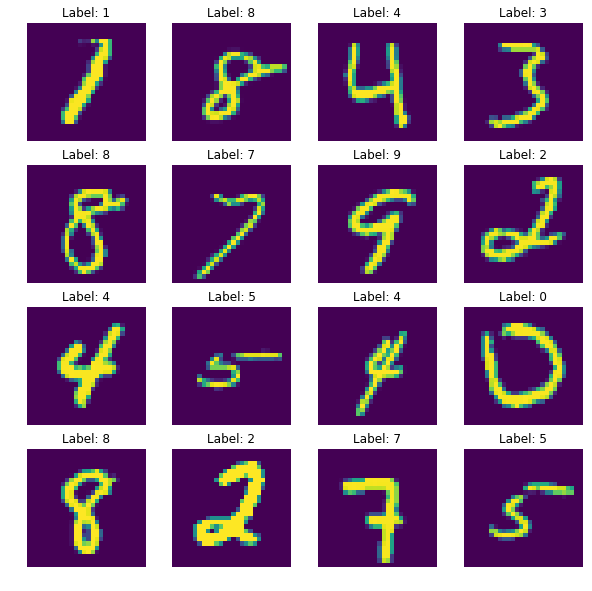

In [9]:
show_examples(train_data, y)

<div style="direction:rtl; text-align:right">

# تجهيز البيانات

<div style="direction:rtl; text-align:right">
في البداية، لايوجد أمامنا الكثير لنعمله في تجهيز البيانات سوى خطوة قد تكون مهمة لبعض النماذج: وهي تسوية البيانات. في تسوية البيانات، نقوم بكل بساطة بجعل كل الأعمدة بنفس المستوى بما يمكننا من المقارنة بين مختلف الأعمدة. هناك العديد من الطرق لتسوية البيانات ولكن سنقوم هنا باستخدام أسهل الطرق وهي بقسمة كل عمود على أكبر قيمة، وذلك لجعل البيانات بين 0 و 1. 

In [10]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

def scale_data(data):
    scaled = data
    for col in scaled.columns:
        maxi = scaled[col].max()
        scaled[col] = scaled[col]/maxi
    return scaled

<div style="direction:rtl; text-align:right">
قبل تسوية البيانات، سنقوم بقراءة المتوسط والانحراف المعياري بمعزل حتى نستخدم هذه القيم في بيانات الاختبار الجديدة:

In [11]:
train_data_scaled = scale_data(train_data)
train_data_scaled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


<div style="direction:rtl; text-align:right">
إذا عملت الخطوات بشكل صحيح، فسنرى الكثير من القيم المفقودة (NaN) ولكن في الحقيقة هذه ليست قيم مفقودة بل أرقام غير معرفة جراء قسمة مجموعة من الأصفار على صفر. لذلك، سنقوم باستبدال كل قيمة مفقودة (NaN) بالرقم 0.

In [12]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

train_data_scaled.fillna(0, inplace=True)

In [13]:
assert np.max(np.max(train_data_scaled)) == 1., 'You got something wrong!'

سنقوم برسم البيانات قبل التسوية و بعدها لنلاحظ الفرق بينها، أدناه رسم البيانات قبل التسوية

Text(0,0.5,'Frequency')

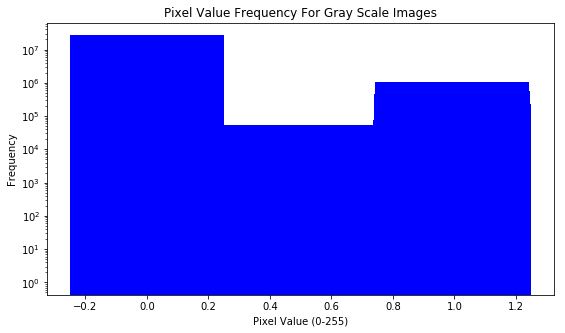

In [14]:
# سنستخدم المتغير train_data
y1 = pd.value_counts(train_data.values.ravel()).sort_index()
x1 = y1.index
width = 0.5
plt.figure(figsize=[20,5])
ax1 = plt.subplot(1, 2, 1)
ax1.bar(x1, y1, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

قم برسم البيانات بعد التسوية لنلاحظ الفرق بين البيانات قبل وبعد التسوية، استخدم مقاسًا مناسبًا لقيمة عرض العمود

(width)

بحيث تكون القيم ما بين 0.01 إلى 0.0001، جربها واختر عرضًا مناسبًا

ولا تنسى تغيير عنوان الرسم البياني ليكون

Pixel Value Frequency For Gray Scale Images After Scalling

ولاحظ أن قيم المحور السيني ستتراوح ما بين 0 إلى 1 وعليه سنقوم بتغيير عنوان المحور السيني ليكون

Pixel Value (0-1)

Text(0,0.5,'Frequency')

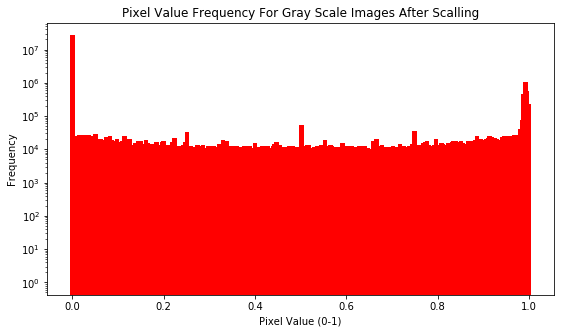

In [15]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################
# استخدم المتغير train_data_scaled
y2 = pd.value_counts(train_data_scaled.values.ravel()).sort_index()
x2 = y2.index
width = 0.01
plt.figure(figsize=[20,5])
ax1 = plt.subplot(1, 2, 1)
ax1.bar(x2, y2, width, color="red")
plt.title('Pixel Value Frequency For Gray Scale Images After Scalling')
plt.yscale('log')
plt.xlabel('Pixel Value (0-1)')
plt.ylabel('Frequency')

<div style="direction:rtl; text-align:right">

# نمذجة البيانات

<div style="direction:rtl; text-align:right">
سنقوم الآن بنمذجة البيانات باستخدام عدة نماذج ونرى كيف يمكن أن نحسن من أداء النموذج. تحديدا، سنقوم بتدريب النموذج باستخدام البيانات الخام (training_data) ثم باستخدام البيانات بعد التسوية (training_data_scaled) ونقارن بين النتيجتين لنعرف إن كان للتسوية أي دور في تحسين أداء النموذج. لنبدأ باستخدام الانحدار اللوجستي. في الخانة أدناه، قم باستيراد كلاً من مكتبة الخوارزمية وأمر cross_val_score ثم استخدمهم في تدريب النموذج والتحقق من صحته.

In [16]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################

# HINT: You should use `train_data` as your input

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

model1 = MultinomialNB()
scores = cross_val_score(model1, train_data, y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<div style="direction:rtl; text-align:right">
الآن سنقوم بطباعة متوسط الدقة:

In [17]:
scores.mean()

0.8235948159893409

<div style="direction:rtl; text-align:right">
الآن سنكرر نفس العملية ولكن باستخدام نموذج آخر من اختيارك. ابحث عن نموذج تصنيفي (classification model) من ضمن مكتبات scikit-learn وقم باستخدامه في تصنيف الأعداد. ملاحظة: تستطيع استخدام train_data_scaled بدلاً من البيانات الخام وتقارن أداء النماذج المختلفة.

In [20]:
############################
# عليك تعديل هذه الخانة قبل تسليم المشروع
# YOU HAVE TO EDIT THIS CELLL
############################
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
scores = cross_val_score(model2, train_data_scaled, y)
scores.mean()

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Def

0.9130236461331501

<div style="direction:rtl; text-align:right">
هل تلاحظ أي فرق في الدقة ؟

من الملاحظ من النتيجة أعلاه
انه عند استخدام التسوية و الخوارزمية LogisticRegression
اعطت نتجية دقة اعلى من عدم استخدام التسوية و استخدام الخوارزمية MultinomialNB

<div style="direction:rtl; text-align:right">
لنقم بمقارنة مصفوفة الالتباس للحالتين ونرى هل يرتكب النموذجين ذات الأخطاء ؟

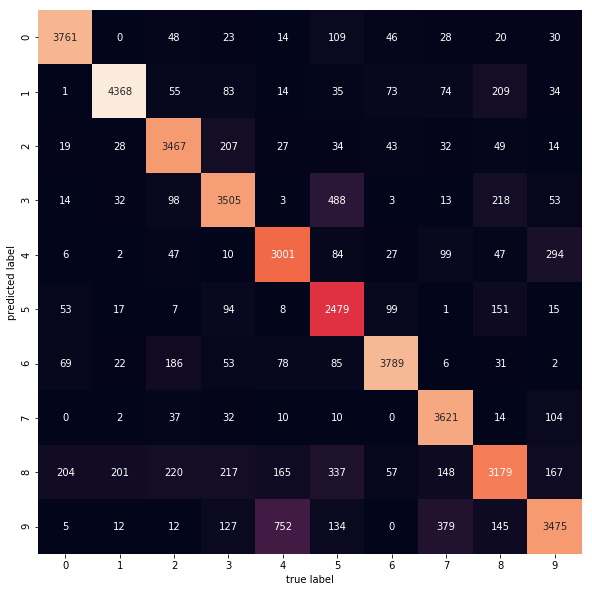

In [22]:
# confusion matrix 1

model1.fit(train_data, y)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, model1.predict(train_data))

plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


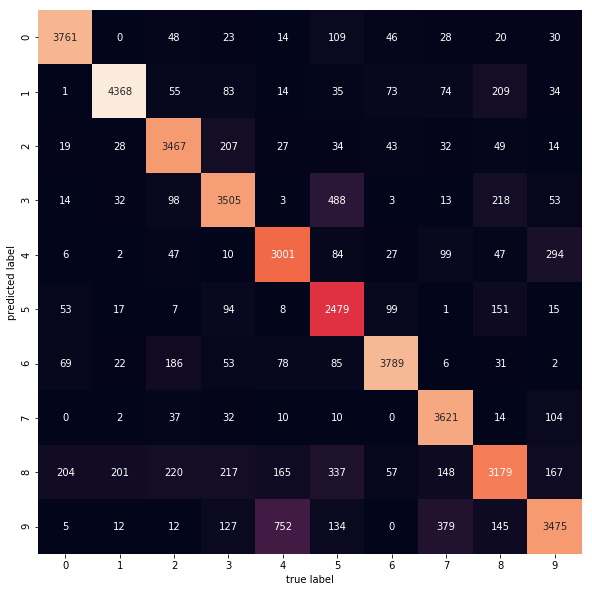

In [23]:

# confusion matrix 2

model2.fit(train_data, y)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, model1.predict(train_data))

plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<div style="direction:rtl; text-align:right">

# تسليم المشروع

<div style="direction:rtl; text-align:right">
قبل تسليم المشروع في موقع كاقل، سوف نستخدم النموذج الأفضل من النماذج أعلاه لمطابقته على جميع البيانات.

In [24]:
model1.fit(train_data, y) # training model on full data

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
test_data['Label'] = model1.predict(test_data)

In [26]:
test_data.index.name = 'ImageId'

In [27]:
test_data.index = test_data.index +1

In [28]:
test_data['Label'].to_csv('./digits_submission.csv', header=True)

<div style="direction:rtl; text-align:right">
والآن اذهب إلى موقع كاقل وقم برفع هذا الملف لترى أداء النموذج عن قرب:

- https://www.kaggle.com/c/digit-recognizer/submit

<div style="direction:rtl; text-align:right">
تسليم هذا المشروع على مرحلتين: الأولى هي في تسليم الملف إلى موقع كاقل ومن ثم مشاركة الرابط، والمرحلة الثانية هي باستكمال الخانات التي تحتاج إلى إكمال ومن ثم التأكد من سلامتها.